In [1]:
!pip install keras-cv keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 34.1 MB/s eta 0:00:00


In [2]:
import json
import keras_cv
import keras
import numpy as np

In [3]:
model = keras_cv.models.ImageClassifier.from_preset(
    'efficientnetv2_b0_imagenet_classifier'
)

100%|██████████| 2.80k/2.80k [00:00<00:00, 706kB/s]


100%|██████████| 28.0M/28.0M [00:03<00:00, 9.04MB/s]


8528/8528 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


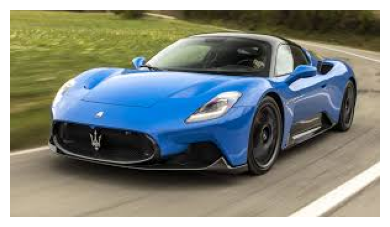

In [4]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzDhN6PT71Exuhr6j6KayhENg5ofz4iXGR1A&s'

filepath = keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)

h, w, c = image.shape
image_batch = image.reshape((1, h, w, c))
keras_cv.visualization.plot_image_gallery(
    image_batch, rows=1, cols=1, value_range = (0, 255), show=True, scale=4
)

In [5]:
probs = model.predict(image_batch)
probs.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


(1, 1000)

In [6]:
top_classes = (-probs[0]).argsort()

In [7]:
top_classes[:5]

array([817, 751, 511, 479, 581])

In [8]:
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/kerascv/imagenet_label_names.json"
label_names_filepath = keras.utils.get_file(origin=url)

with open(label_names_filepath) as f:
  labels_names = json.load(f)

14193/14193 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
labels_names

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead shark',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'American robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'American dipper',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'fire salamander',
 'smooth newt',
 'newt',
 'spotted salamander',
 'axolotl',
 'American bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead sea turtle',
 'leatherback sea turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'green iguana',
 'Carolina anole',
 'desert grassland whiptail lizard',
 'agama',
 'frilled-necked lizard',
 'alligator lizard',
 'Gila monster',
 'European green lizard',
 'chameleon',
 'Komodo dragon',
 'Nile crocodile',
 'American alligator',
 'triceratops',
 'worm snake',
 'ring-necked snake',
 'eastern hog-nosed snake',
 'smooth green snake',
 'kingsnake',
 'garter snake',
 'water snake',
 'vin

In [10]:
for c in top_classes[:5]:
  print(labels_names[c])

sports car
race car
convertible
car wheel
grille
